In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np

# Loading the training and test datasets
train = pd.read_csv('bank-full.csv', sep=';')  
test = pd.read_csv('bank.csv', sep=';')

In [3]:

# Checking the shape of both datasets
print("Train shape:", train.shape)
print("Test shape:", test.shape)

# Checking the data types and missing values
print(train.info())
print(test.info())




Train shape: (45211, 17)
Test shape: (4521, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeInd

In [ ]:
# Viewing the first 10 rows to understand the data
print(train.head(10))
print(test.head(10))

   age           job   marital  education default  balance housing loan  \
0   58    management   married   tertiary      no     2143     yes   no   
1   44    technician    single  secondary      no       29     yes   no   
2   33  entrepreneur   married  secondary      no        2     yes  yes   
3   47   blue-collar   married    unknown      no     1506     yes   no   
4   33       unknown    single    unknown      no        1      no   no   
5   35    management   married   tertiary      no      231     yes   no   
6   28    management    single   tertiary      no      447     yes  yes   
7   42  entrepreneur  divorced   tertiary     yes        2     yes   no   
8   58       retired   married    primary      no      121     yes   no   
9   43    technician    single  secondary      no      593     yes   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may     

In [ ]:
# Checking for duplicates in both datasets
train.duplicated().sum()
test.duplicated().sum()

np.int64(0)

In [ ]:
# Defining numerical and categorical feature columns
numerical_columns = ['age', 'balance', 'day', 'duration','campaign','pdays','previous']

categorical_columns = ['job', 'marital', 'education', 'default','housing','loan', 'contact',
                    'month', 'poutcome']

In [5]:
# Checking for outliers in numerical columns using IQR method

for col in numerical_columns:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outlier_count = ((train[col] < lower) | (train[col] > upper)).sum()
    print(f"{col}: {outlier_count} outliers")


age: 487 outliers
balance: 4729 outliers
day: 0 outliers
duration: 3235 outliers
campaign: 3064 outliers
pdays: 8257 outliers
previous: 8257 outliers


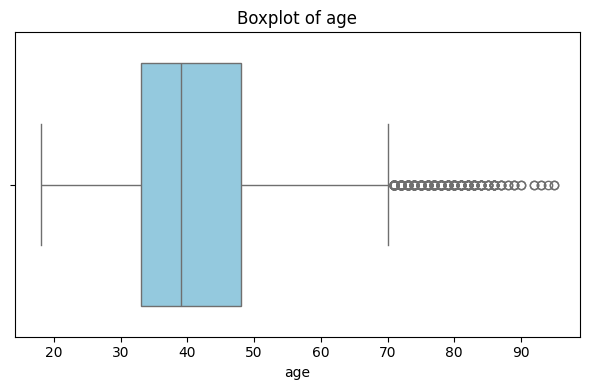

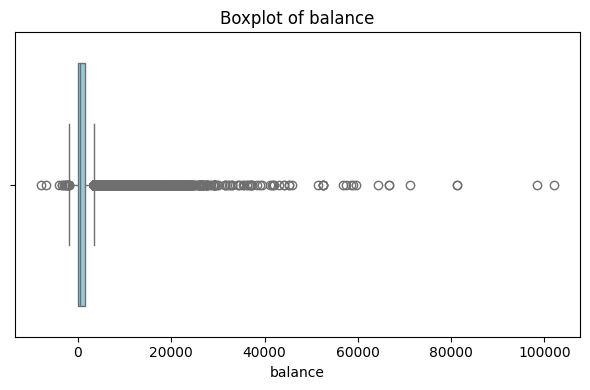

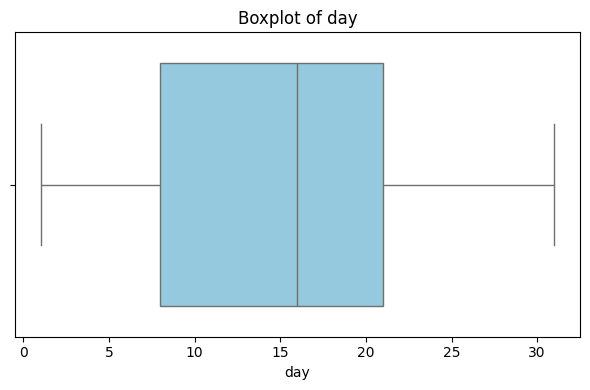

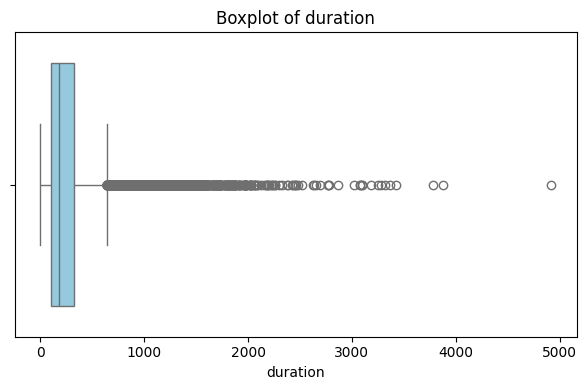

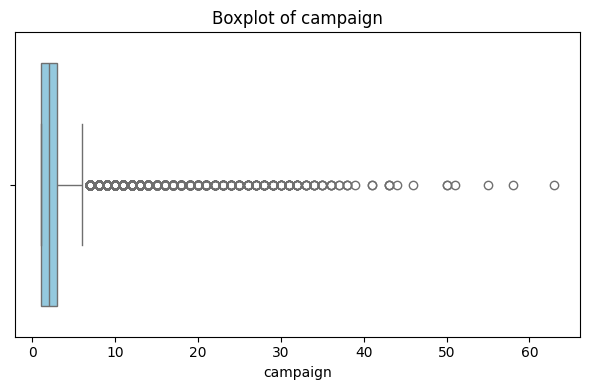

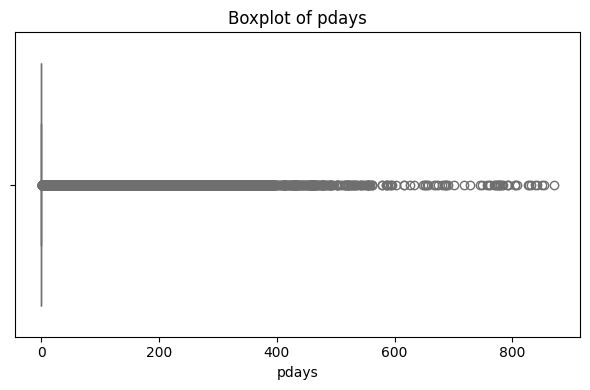

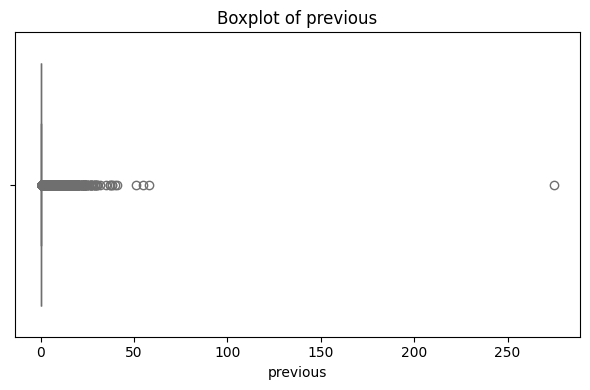

In [6]:
# Plotting boxplots to check for outliers in numerical columns 
import matplotlib.pyplot as plt
import seaborn as sns
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=train[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()



In [7]:
# Capping outliers using IQR method
def cap_outliers_iqr(df, columns):
    df = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replacing outliers with the caps
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df

numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Applying the outlier capping function to the training dataset
train = cap_outliers_iqr(train, numerical_cols)



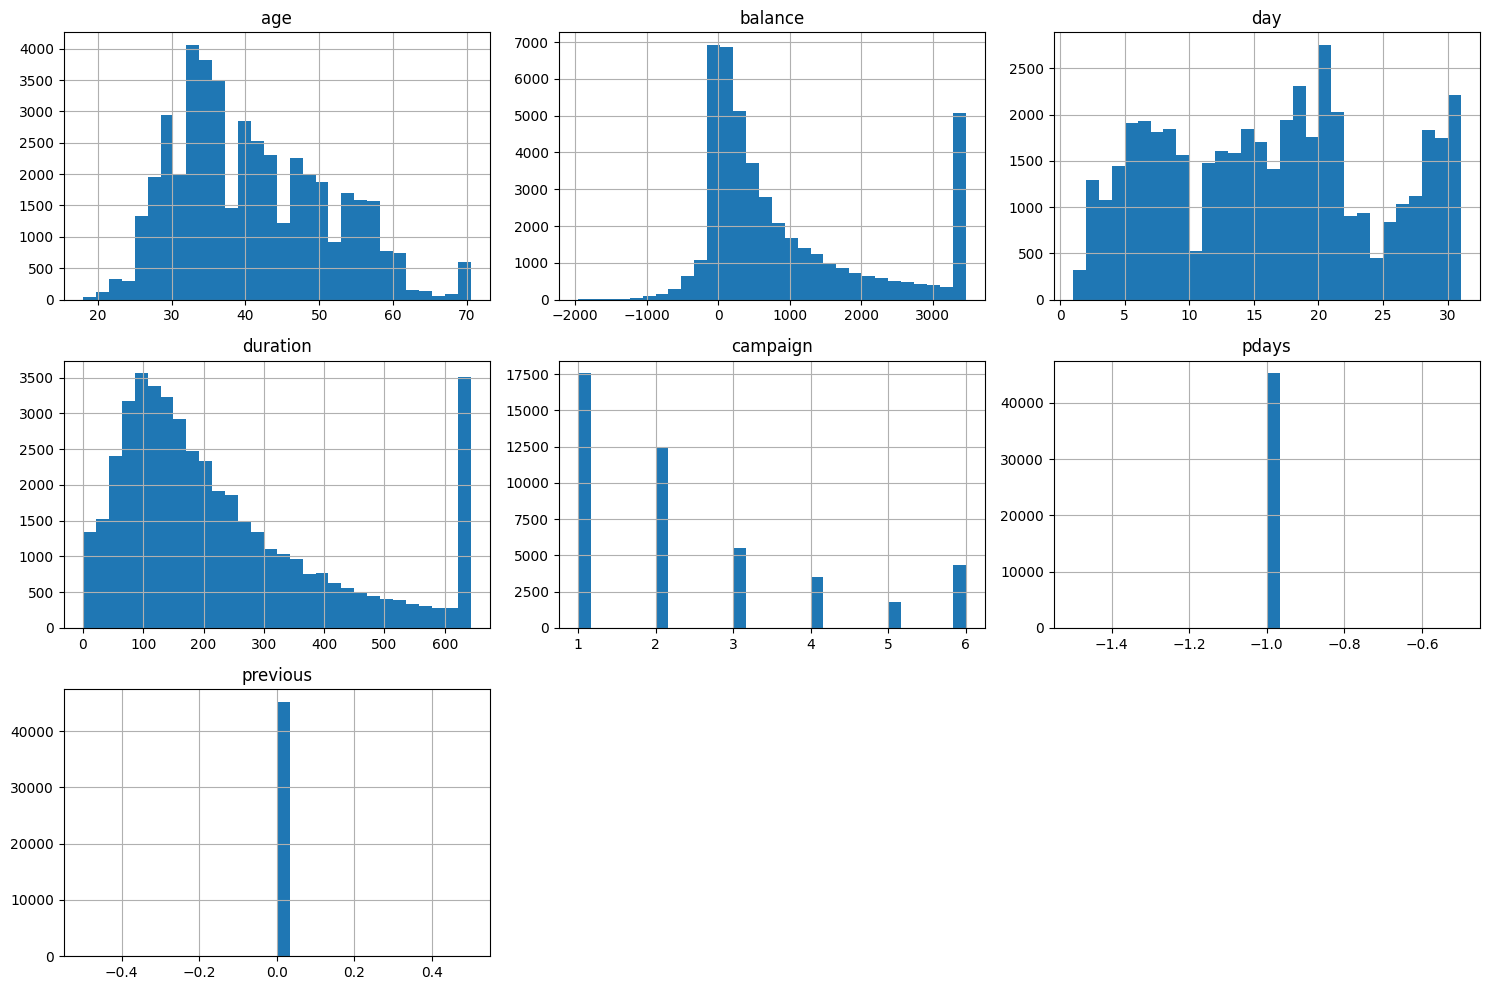

In [ ]:
# Plotting histograms for all numerical features to visualize their distributions
import matplotlib.pyplot as plt

train.select_dtypes(include=['int64', 'float64']).hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

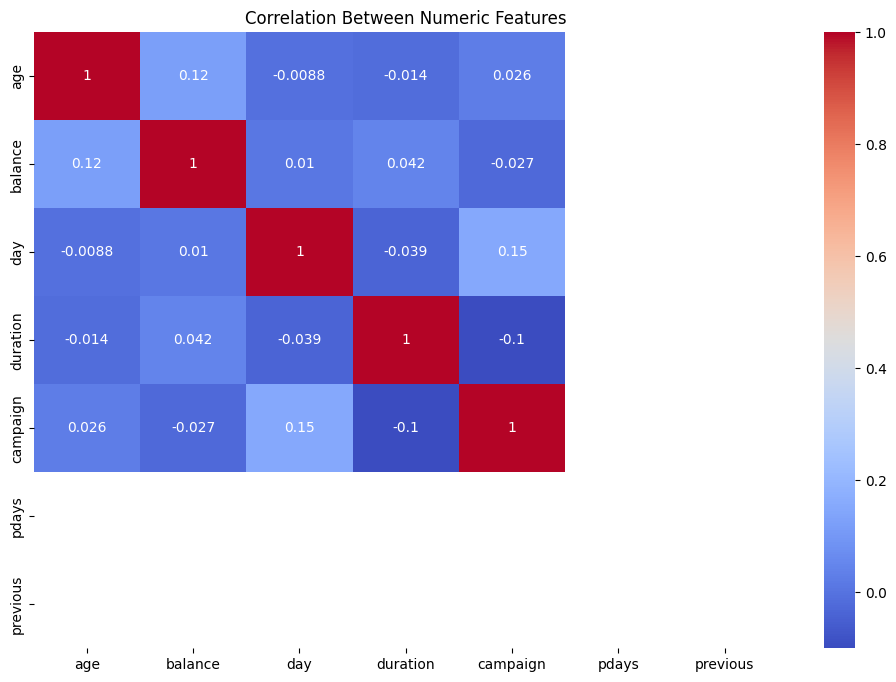

In [14]:
# Checking correlation between numeric features using a heatmap

import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(train.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numeric Features")
plt.show()

In [16]:
# checking category counts for each categorical column

cat_cols = train.select_dtypes(include='object').columns

for col in cat_cols:
    print(f"\n{col} value counts:\n{train[col].value_counts()}")


job value counts:
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

marital value counts:
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

education value counts:
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

default value counts:
default
no     44396
yes      815
Name: count, dtype: int64

housing value counts:
housing
yes    25130
no     20081
Name: count, dtype: int64

loan value counts:
loan
no     37967
yes     7244
Name: count, dtype: int64

contact value counts:
contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

month value counts:
month
may    13766
jul     6895
aug     6247
jun     5341
nov

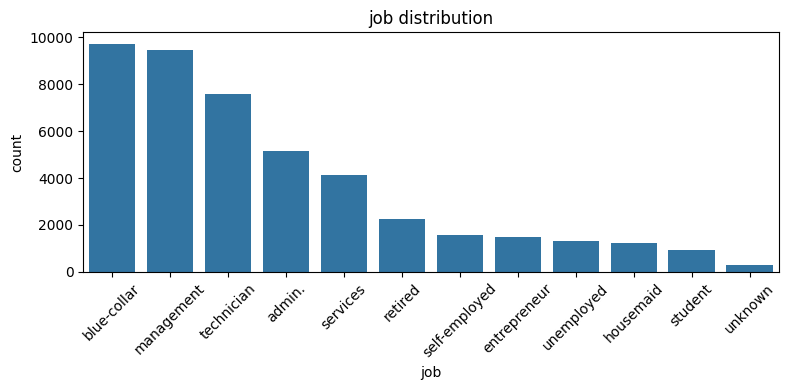

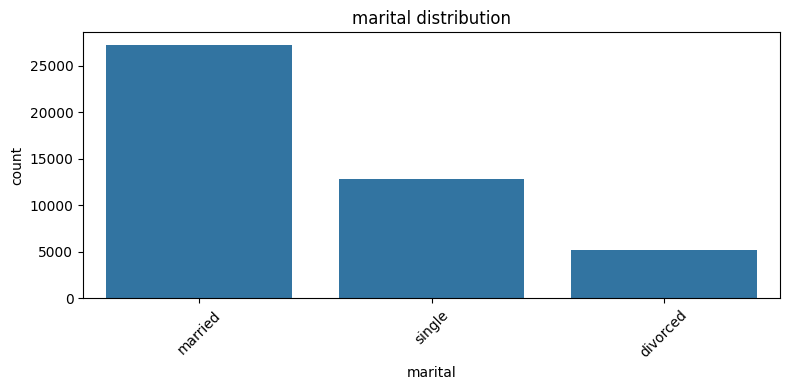

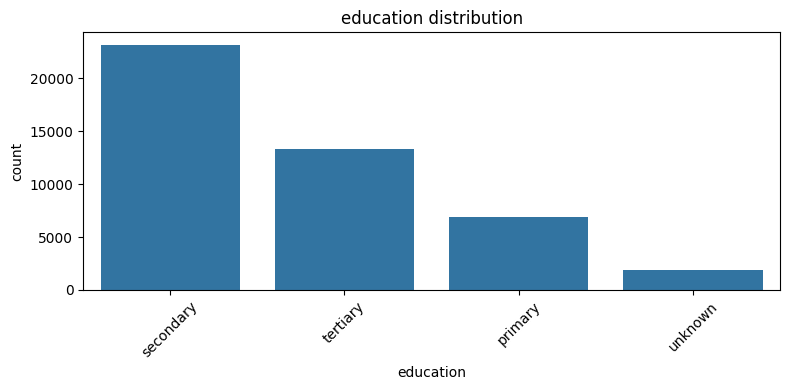

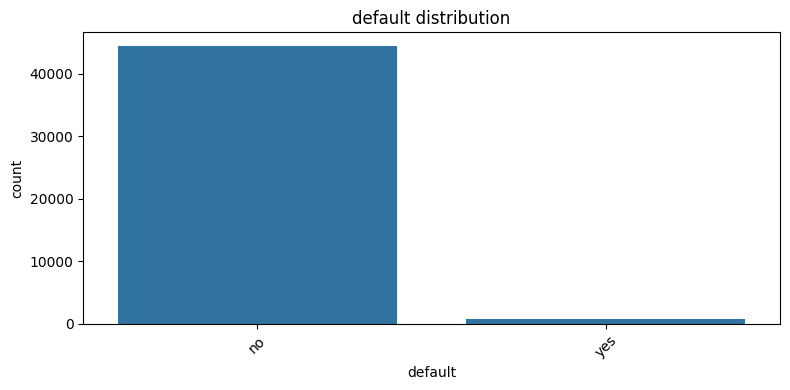

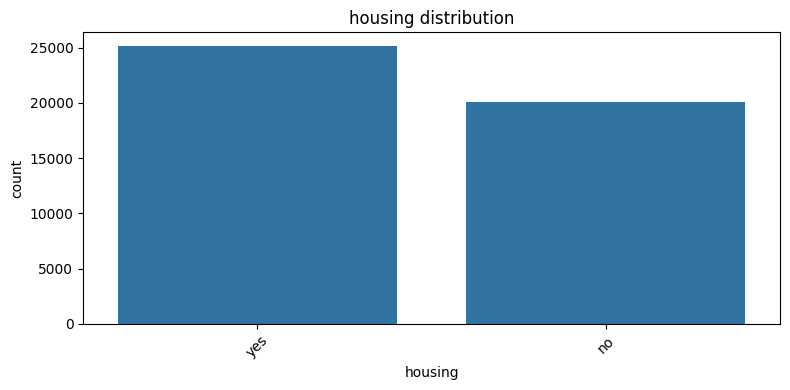

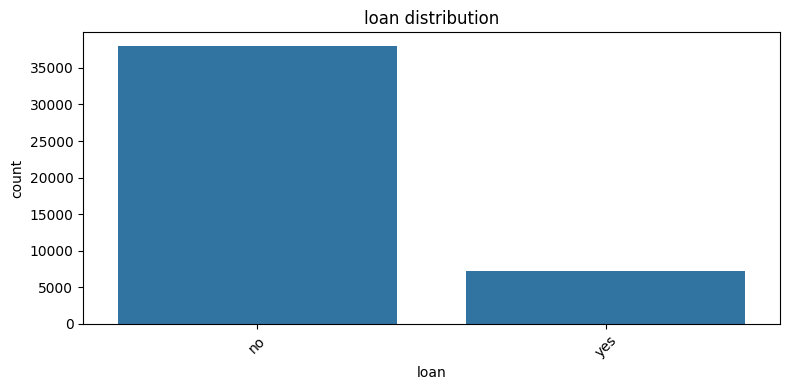

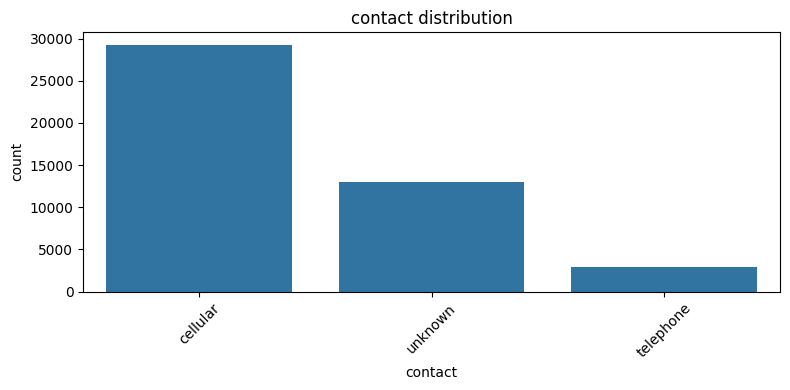

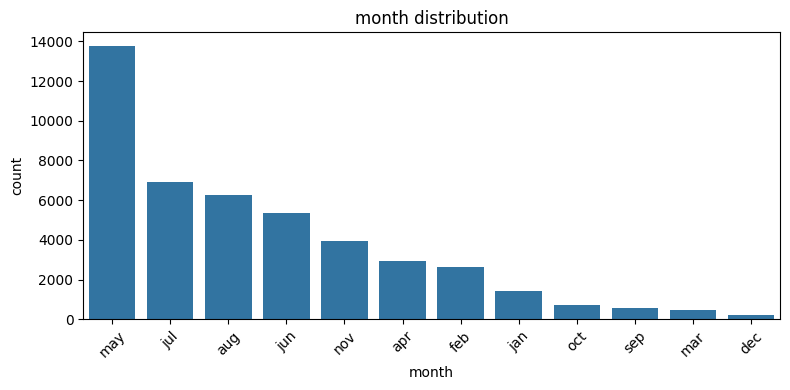

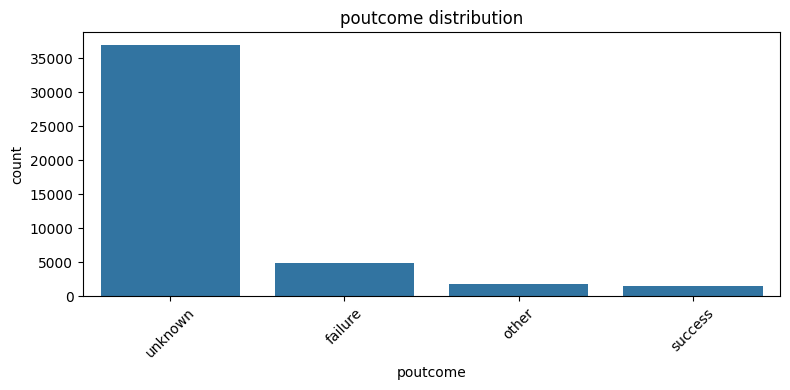

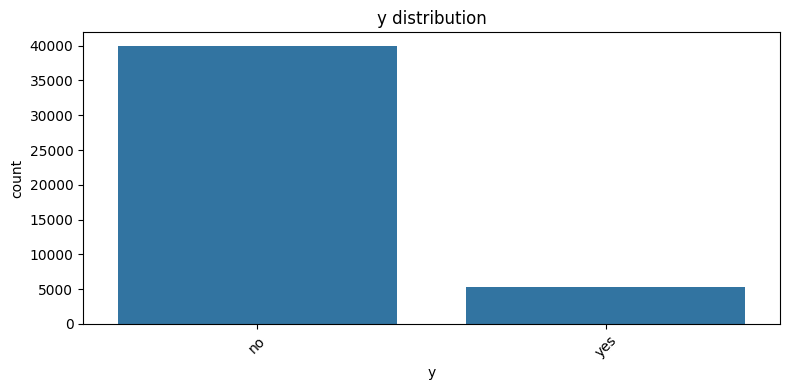

In [18]:
# plotting count distribution for each categorical column

for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=train, x=col, order=train[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"{col} distribution")
    plt.tight_layout()
    plt.show()

In [8]:
# Converting target column 'y' to binary values
train['y'] = train['y'].map({'yes': 1, 'no': 0})

In [9]:
# Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression


# Defining features (X) and target (y)
X = train.drop(columns=['y'])
y = train['y']


# Defining preprocessing steps for numeric and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ])

# Building the pipeline: preprocessing + model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced', random_state=42))
])


# Training the full pipeline on the dataset
pipeline.fit(X,y)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [10]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

## Checking model accuracy on training data

y_pred_train = pipeline.predict(X)   # Making predictions on training data
train_accuracy = accuracy_score(y, y_pred_train)   # Calculating training accuracy
print(f"Training Accuracy: {train_accuracy*100:.2f}%")

# Showing classification report for training data
print("\nTraining Classification Report:")
print(classification_report(y, y_pred_train))
print(confusion_matrix(y, y_pred_train))   # Showing confusion matrix


# Changing labels in test set to 1 and 0
test['y'] = test['y'].map({'yes': 1, 'no': 0}) 

# Separating features and target in test set
y_test = test['y']
X_test = test.drop(columns=['y'])

# Making predictions on test data
y_pred_test = pipeline.predict(X_test)

# Calculating and printing test accuracy
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

# Showing classification report for test data
print("\nTest Classification Report:")
print(classification_report(y_test, y_pred_test))

# Showing confusion matrix for test data
print(confusion_matrix(y_test, y_pred_test))

Training Accuracy: 83.13%

Training Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.83      0.90     39922
           1       0.40      0.84      0.54      5289

    accuracy                           0.83     45211
   macro avg       0.69      0.83      0.72     45211
weighted avg       0.91      0.83      0.85     45211

[[33151  6771]
 [  856  4433]]
Test Accuracy: 81.53%

Test Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.81      0.89      4000
           1       0.37      0.83      0.51       521

    accuracy                           0.82      4521
   macro avg       0.67      0.82      0.70      4521
weighted avg       0.90      0.82      0.84      4521

[[3253  747]
 [  88  433]]
